## Латиков Александр, задача 11.9.5

Задача - необходимо решить периодический диффур:

y" - P(x)^2 * y = f(x) 

Период T = 1

P(x)^2 = 10 + sin(2pix)

f(x) = cos(2pix)

Для решения задачи используется метод прогонки для периодических граничных условий. Взял отсюда http://www.mathnet.ru/links/108b12324441e65bf8e349f4ae493ef1/zvmmf7856.pdf

In [12]:
import numpy as np              
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [43]:
h = 0.0001
N = 10000

def P2(x):
    return 10 + np.sin(2 * np.pi * x)

def f(x):
    return np.cos(2 * np.pi * x)

In [44]:
def M(N):
    M = np.zeros(N * N, dtype = float).reshape(N, N)
    for i in range(N):
        M[i][(i + N - 1) % N] = 1.0 / (h ** 2)
        M[i][i] = -2.0 / (h ** 2) - P2(i * h)
        M[i][(i + 1) % N] = 1.0 / (h ** 2)
    return M

def k(N):
    b = np.zeros(N, dtype = float)
    for i in range(N):
        b[i] = f(i * h)
    return b

In [45]:
def diag_solve(A, b):
    n = b.size
    for i in range(1, n):
        k = A[i][i - 1] / A[i - 1][i - 1]
        A[i][i - 1] = 0.0
        A[i][i] -= k * A[i - 1][i]
        b[i] -= k * b[i - 1]
        
    b[n - 1] /= A[n - 1][n - 1]
    
    for j in range(1, n):
        i = n - j - 1
        b[i] -= A[i][i + 1] * b[i + 1]
        b[i] /= A[i][i]
        
    return b

In [41]:
A = np.array([[2.0, 1.0, 0.0], [1.0, 2.0, 1.0], [0.0, 2.0, 3.0]])
b = np.array([2.0, 2.0, 3.0])
print(diag_solve(A, b))

[1. 0. 1.]


In [46]:
A = M(N)
b = k(N)

A1 = np.zeros((N - 1) * (N - 1), dtype = float).reshape((N - 1), (N - 1))
for i in range(N - 1):
    for j in range(N - 1):
        A1[i][j] = A[i][j]
        
b1 = np.zeros(N - 1, dtype = float)
for i in range(N - 1):
    b1[i] = b[i]
    
u1 = np.zeros(N - 1, dtype = float)
u1[0] = -A[0][N - 1]
u1[N - 2] = -A[N - 2][N - 1]

p1 = diag_solve(np.copy(A1), np.copy(b1))
q1 = diag_solve(np.copy(A1), np.copy(u1))

y = np.zeros(N, dtype = float)
y[N - 1] = (-b[N - 1] + A[N - 1][0] * p1[0] + A[N - 1][N - 2] * p1[N - 2]) / (-A[N - 1][N - 1] - A[N - 1][0] * q1[0] - A[N - 1][N - 2] * q1[N - 2])
for j in range(N - 1):
    i = N - j - 2
    y[i] = p1[i] + y[i + 1] * q1[i]

for i in range(y.size):
    print(y[i])

-0.018996293546029448
-0.018996002690981468
-0.01899542873895686
-0.01899457920155621
-0.01899346135274474
-0.01899208223733887
-0.018990448679158913
-0.01898856728886207
-0.018986444471469428
-0.018984086433599785
-0.01898149919042285
-0.018978688572343465
-0.01897566023142828
-0.01897241964758557
-0.01896897213450852
-0.018965322845391822
-0.01896147677843095
-0.018957438782113124
-0.0189532135603085
-0.01894880567716983
-0.018944219561848392
-0.018939459513033736
-0.01893452970332432
-0.018929434183436008
-0.018924176886254866
-0.018918761630740587
-0.01891319212568657
-0.01890747197334231
-0.018901604672903655
-0.01889559362387615
-0.01888944212931655
-0.01888315339895722
-0.01887673055221815
-0.018870176621110915
-0.018863494553038842
-0.018856687213497425
-0.018849757388678872
-0.018842707787984532
-0.018835541046448676
-0.018828259727077152
-0.018820866323104108
-0.01881336326016996
-0.0188057528984236
-0.01879803753455171
-0.018790219403737967
-0.018782300681554804
-0.018774283

-0.012137955372889548
-0.012122612074424326
-0.012107264856225413
-0.012091913723392458
-0.012076558681005684
-0.012061199734126064
-0.012045836887795506
-0.012030470147037023
-0.0120150995168549
-0.011999725002234876
-0.011984346608144316
-0.011968964339532366
-0.01195357820133014
-0.011938188198450862
-0.011922794335790047
-0.011907396618225655
-0.01189199505061825
-0.011876589637811158
-0.011861180384630623
-0.011845767295885974
-0.011830350376369769
-0.01181492963085794
-0.011799505064109959
-0.011784076680868973
-0.011768644485861965
-0.011753208483799887
-0.011737768679377808
-0.011722325077275065
-0.011706877682155392
-0.011691426498667069
-0.01167597153144306
-0.011660512785101143
-0.01164505026424406
-0.011629583973459638
-0.011614113917320933
-0.011598640100386354
-0.011583162527199799
-0.01156768120229078
-0.011552196130174556
-0.011536707315352258
-0.011521214762311011
-0.01150571847552406
-0.011490218459450901
-0.01147471471853739
-0.011459207257215876
-0.01144369607990531

-0.005164211000228574
-0.0051475195198177285
-0.005130825620990179
-0.005114129306697315
-0.005097430579890371
-0.005080729443520429
-0.005064025900538423
-0.005047319953895148
-0.005030611606541264
-0.005013900861427299
-0.004997187721503659
-0.004980472189720629
-0.004963754269028382
-0.004947033962376982
-0.004930311272716389
-0.004913586202996465
-0.004896858756166981
-0.004880128935177617
-0.0048633967429779715
-0.004846662182517566
-0.004829925256745848
-0.004813185968612198
-0.0047964443210659295
-0.004779700317056304
-0.004762953959532529
-0.004746205251443763
-0.004729454195739122
-0.0047127007953676825
-0.0046959450532784875
-0.004679186972420552
-0.004662426555742867
-0.004645663806194404
-0.004628898726724118
-0.004612131320280954
-0.0045953615898138515
-0.00457858953827175
-0.004561815168603593
-0.00454503848375833
-0.004528259486684922
-0.004511478180332349
-0.004494694567649613
-0.0044779086515857386
-0.004461120435089783
-0.0044443299211108355
-0.004427537112598025
-0.0

0.002197125640456582
0.0022145820112065896
0.0022320395047136145
0.0022494981178527414
0.00226695784749844
0.0022844186905245636
0.0023018806438043506
0.002319343704210423
0.0023368078686147866
0.0023542731338888332
0.0023717394969033356
0.002389206954528453
0.0024066755036337263
0.0024241451410880813
0.002441615863759827
0.0024590876685166565
0.002476560552225646
0.0024940345117532552
0.0025115095439653275
0.00252898564572709
0.0025464628139031517
0.002563941045357506
0.00258142033695353
0.002598900685553983
0.0026163820880210076
0.0026338645412161306
0.002651348042000261
0.0026688325872336895
0.002686318173776092
0.0027038047984865262
0.0027212924582234333
0.0027387811498446367
0.002756270870207343
0.0027737616161681434
0.00279125338458301
0.0028087461723072986
0.0028262399761957487
0.002843734793102481
0.002861230619881
0.0028787274533841937
0.0028962252904643332
0.0029137241279730717
0.0029312239627614454
0.0029487247916798747
0.002966226611578162
0.0029837294193054923
0.0030012332

0.014542409040519434
0.014559851454759767
0.014577292661633934
0.01459473265766835
0.01461217143938915
0.014629609003322183
0.014647045345993006
0.014664480463926894
0.014681914353648842
0.014699347011683555
0.014716778434555463
0.014734208618788706
0.014751637560907156
0.014769065257434395
0.014786491704893729
0.014803916899808187
0.014821340838700521
0.014838763518093202
0.014856184934508423
0.014873605084468106
0.014891023964493898
0.014908441571107172
0.014925857900829027
0.014943272950180287
0.014960686715681513
0.01497809919385299
0.014995510381214733
0.015012920274286494
0.015030328869587743
0.015047736163637693
0.015065142152955287
0.01508254683405921
0.015099950203467874
0.015117352257699425
0.015134752993271744
0.015152152406702452
0.015169550494508906
0.015186947253208207
0.015204342679317188
0.015221736769352425
0.015239129519830238
0.015256520927266686
0.01527391098817757
0.01529129969907843
0.015308687056484551
0.01532607305691097
0.015343457696872469
0.015360840972883573

0.032821922176048346
0.03283570571318486
0.03284948409766428
0.03286325732625824
0.032877025395739154
0.03289078830288017
0.0329045460444552
0.03291829861723894
0.03293204601800684
0.03294578824353511
0.03295952529060072
0.03297325715598142
0.032986983836455736
0.03300070532880295
0.03301442162980311
0.033028132736237045
0.03304183864488637
0.03305553935253344
0.03306923485596143
0.03308292515195425
0.03309661023729659
0.03311029010877395
0.03312396476317257
0.03313763419727951
0.03315129840788257
0.033164957391770354
0.033178611145732236
0.033192259666558394
0.03320590295103976
0.03321954099596808
0.03323317379813586
0.03324680135433643
0.033260423661363864
0.033274040716013066
0.0332876525150797
0.033301259055360244
0.03331486033365194
0.03332845634675286
0.03334204709146184
0.03335563256457852
0.03336921276290335
0.03338278768323756
0.03339635732238318
0.033409921677143045
0.033423480744320805
0.03343703452072089
0.03345058300314852
0.033464126188409764
0.03347766407331145
0.0334911

0.03823229330003505
0.038243574826732414
0.03825484989575062
0.03826611850427941
0.03827738064950971
0.03828863632863362
0.03829988553884445
0.038311128277336653
0.03832236454130591
0.038333594327949055
0.03834481763446414
0.038356034458050366
0.038367244795908174
0.038378448645239156
0.03838964600324611
0.03840083686713304
0.038412021234105115
0.03842319910136874
0.038434370466131476
0.03844553532560209
0.03845669367699056
0.03846784551750807
0.03847899084436699
0.038490129654780894
0.03850126194596454
0.038512387715133906
0.03852350695950617
0.03853461967629973
0.03854572586273416
0.038556825516030256
0.038567918633410025
0.03857900521209668
0.038590085249314635
0.038601158742289525
0.03861222568824818
0.03862328608441867
0.03863433992803026
0.03864538721631343
0.03865642794649987
0.03866746211582251
0.03867848972151547
0.0386895107608141
0.03870052523095496
0.03871153312917584
0.03872253445271576
0.03873352919881492
0.03874451736471479
0.03875549894765805
0.03876647394488857
0.03877

0.04238614943528625
0.04239447211564945
0.04240278726909684
0.042411094893399656
0.04241939498633071
0.04242768754566438
0.042435972569176604
0.0424442500546449
0.04245251999984836
0.04246078240256763
0.042469037260584944
0.04247728457168411
0.04248552433365048
0.04249375654427101
0.042501981201334214
0.04251019830263019
0.04251840784595061
0.042526609829088735
0.04253480424983941
0.04254299110599903
0.042551170395365594
0.04255934211573868
0.04256750626491945
0.04257566284071064
0.04258381184091657
0.04259195326334315
0.04260008710579788
0.042608213366089845
0.04261633204202972
0.042624443131429754
0.04263254663210379
0.04264064254186727
0.042648730858537216
0.042656811579932244
0.04266488470387256
0.04267295022817996
0.042681008150677865
0.04268905846919125
0.04269710118154671
0.04270513628557242
0.04271316377909815
0.042721183659955295
0.04272919592597682
0.042737200574997296
0.042745197604852916
0.04275318701338146
0.0427611687984223
0.04276914295781644
0.04277710948940644
0.042785

0.045837048015348276
0.04584079610704235
0.04584453568365089
0.045848266743958324
0.04585198928675108
0.04585570331081756
0.045859408814948155
0.04586310579793525
0.04586679425857319
0.04587047419565835
0.04587414560798905
0.04587780849436562
0.04588146285359036
0.045885108684467595
0.0458887459858036
0.045892374756406645
0.04589599499508701
0.04589960670065696
0.04590320987193075
0.04590680450772462
0.0459103906068568
0.04591396816814754
0.04591753719041906
0.04592109767249558
0.04592464961320335
0.045928193011370556
0.04593172786582743
0.04593525417540616
0.045938771938940956
0.04594228115526802
0.04594578182322556
0.04594927394165377
0.045952757509394836
0.04595623252529298
0.04595969898819441
0.04596315689694731
0.0459666062504019
0.045970047047410395
0.045973479286827004
0.04597690296750796
0.045980318088311475
0.04598372464809779
0.045987122645729114
0.0459905120800697
0.0459938929499858
0.045997265254345665
0.046000628992019545
0.0460039841618797
0.04600733076280043
0.0460106687

0.04658281320952659
0.04658171571000748
0.04658060934028913
0.046579494100328946
0.04657836999008655
0.046577237009523785
0.046576095158604724
0.04657494443729565
0.046573784845565055
0.04657261638338368
0.04657143905072446
0.046570252847562554
0.04656905777387534
0.04656785382964241
0.04656664101484559
0.04656541932946891
0.046564188773498646
0.046562949346923274
0.0465617010497335
0.04656044388192222
0.046559177843484595
0.046557902934417986
0.04655661915472199
0.04655532650439842
0.04655402498345129
0.04655271459188688
0.046551395329713655
0.04655006719694231
0.04654873019358578
0.046547384319659206
0.04654602957517997
0.04654466596016765
0.046543293474644094
0.046541912118633316
0.04654052189216158
0.046539122795257376
0.04653771482795144
0.046536297990276705
0.04653487228226835
0.04653343770396376
0.04653199425540255
0.04653054193662657
0.04652908074767987
0.046527610688608764
0.046526131759461783
0.04652464396028967
0.046523147291145386
0.04652164175208415
0.04652012734316339
0.0

0.04459966085306491
0.044593671629865106
0.044587673860978054
0.04458166754761253
0.04457565269097953
0.04456962929229227
0.044563597352766215
0.04455755687361902
0.0445515078560706
0.04454545030134306
0.04453938421066077
0.044533309585250286
0.044527226426340424
0.0445211347351622
0.044515034512948845
0.04450892576093583
0.04450280848036086
0.044496682672463844
0.04449054833848691
0.04448440547967443
0.044478254097272976
0.044472094192531356
0.0444659257667006
0.044459748821033956
0.0444535633567869
0.04444736937521712
0.04444116687758452
0.044434955865151254
0.044428736339181665
0.04442250830094234
0.044416271751702055
0.04441002669273182
0.044403773125304885
0.04439751105069668
0.044391240470184876
0.044384961385049375
0.04437867379657229
0.04437237770603794
0.04436607311473288
0.04435976002394586
0.04435343843496784
0.04434710834909205
0.04434076976761389
0.044334422691831
0.04432806712304322
0.04432170306255262
0.04431533051166347
0.04430894947168228
0.044302559943917755
0.0442961

0.039772310097449325
0.03976166035722734
0.0397510031279988
0.03974033841219439
0.03972966621224677
0.03971898653059057
0.03970829936966235
0.03969760473190065
0.03968690261974597
0.039676193035640774
0.03966547598202947
0.03965475146135844
0.039644019476076015
0.039633280028632464
0.039622533121480036
0.03961177875707293
0.0396010169378673
0.03959024766632124
0.03957947094489481
0.039568686776050015
0.03955789516225082
0.03954709610596313
0.03953628960965481
0.03952547567579566
0.03951465430685745
0.03950382550531388
0.03949298927364059
0.03948214561431517
0.03947129452981718
0.0394604360226281
0.03944957009523137
0.03943869675011235
0.039427815989758364
0.03941692781665867
0.03940603223330447
0.039395129242188895
0.03938421884580705
0.03937330104665593
0.03936237584723451
0.039351443250043666
0.03934050325758625
0.039329555872367014
0.03931860109689267
0.03930763893367184
0.0392966693852151
0.03928569245403496
0.039274708142645845
0.03926371645356412
0.039252717389308106
0.0392417109

0.03226526057167525
0.032250671796996644
0.03223607728410654
0.03222147703644685
0.03220687105746092
0.03219225935059351
0.03217764191929079
0.03216301876700033
0.03214838989717113
0.032133755313253576
0.0321191150186995
0.0321044690169621
0.032089817311496016
0.03207515990575727
0.03206049680320329
0.03204582800729291
0.032031153521486375
0.032016473349245324
0.0320017874940328
0.031987095959313226
0.03197239874855245
0.03195769586521769
0.031942987312777574
0.031928273094702114
0.031913553214462716
0.03189882767553219
0.03188409648138473
0.03186935963549592
0.031854617141342724
0.0318398690024035
0.031825115222158
0.031810355804087344
0.03179559075167404
0.031780820068401994
0.03176604375775646
0.0317512618232241
0.03173647426829296
0.031721681096452424
0.0317068823111933
0.03169207791600774
0.031677267914389295
0.03166245230983287
0.03164763110583474
0.03163280430589256
0.03161797191350535
0.03160313393217351
0.031588290365398786
0.03157344121668432
0.031558586489534586
0.0315437261

0.02576028936773481
0.02574363020892123
0.025726966847722115
0.025710299288062198
0.02569362753386711
0.025676951589063364
0.025660271457578362
0.02564358714334041
0.0256268986502787
0.02561020598232331
0.025593509143405205
0.025576808137456237
0.025560102968409132
0.025543393640197507
0.025526680156755847
0.025509962522019522
0.025493240739924795
0.025476514814408793
0.025459784749409513
0.02544305054886583
0.025426312216717505
0.025409569756905146
0.025392823173370254
0.025376072470055182
0.025359317650903157
0.02534255871985827
0.025325795680865487
0.025309028537870624
0.025292257294820354
0.025275481955662215
0.02525870252434461
0.025241919004816794
0.02522513140102888
0.02520833971693184
0.025191543956477498
0.025174744123618517
0.02515794022230842
0.025141132256501587
0.025124320230153235
0.025107504147219427
0.025090684011657073
0.025073859827423932
0.025057031598478594
0.02504019932878049
0.025023363022289913
0.025006522682967977
0.024989678314776633
0.024972829921678666
0.0249

0.01590903314331917
0.015890657191388914
0.015872279329460462
0.015853899561735087
0.015835517892414143
0.01581713432569906
0.015798748865791343
0.01578036151689257
0.01576197228320439
0.015743581168928513
0.015725188178266732
0.015706793315420894
0.015688396584592916
0.01566999798998478
0.01565159753579852
0.015633195226236244
0.015614791065500112
0.015596385057792341
0.015577977207315205
0.01555956751827103
0.015541155994862197
0.015522742641291132
0.015504327461760316
0.01548591046047228
0.0154674916416296
0.015449071009434896
0.015430648568090831
0.015412224321800106
0.015393798274765466
0.015375370431189691
0.015356940795275605
0.015338509371226064
0.015320076163243957
0.015301641175532205
0.01528320441229376
0.01526476587773161
0.015246325576048759
0.015227883511448246
0.015209439688133132
0.015190994110306503
0.015172546782171462
0.015154097707931136
0.01513564689178867
0.015117194337947226
0.015098740050609984
0.01508028403398013
0.015061826292260872
0.01504336682965542
0.01502

0.005178414981101559
0.005159628982998248
0.005140843449552204
0.0051220583847458295
0.005103273792560661
0.0050844896769773615
0.005065706041975717
0.005046922891534642
0.005028140229632171
0.005009358060245461
0.004990576387350784
0.004971795214923534
0.0049530145469382164
0.00493423438736845
0.004915454740186963
0.004896675609365595
0.004877896998875291
0.004859118912686102
0.004840341354767182
0.0048215643290867895
0.0048027878396122775
0.004784011890310099
0.004765236485145804
0.004746461628084033
0.004727687323088523
0.0047089135741220966
0.004690140385146666
0.004671367760123231
0.0046525957030118725
0.004633824217771756
0.004615053308361129
0.004596282978737315
0.004577513232856713
0.004558744074674798
0.004539975508146116
0.004521207537224288
0.004502440165861999
0.004483673398011005
0.004464907237622122
0.0044461416886452335
0.00442737675502928
0.004408612440722262
0.004389848749671239
0.004371085685822325
0.0043523232531206876
0.004333561455510542
0.004314800296935158
0.0042

-0.0017631666812610747
-0.0017815121790943082
-0.0017998558055542394
-0.001818197557140873
-0.0018365374303560631
-0.0018548754217035163
-0.0018732115276887942
-0.0018915457448193207
-0.0019098780696043833
-0.0019282084985551388
-0.0019465370281846184
-0.0019648636550077293
-0.0019831883755412607
-0.002001511186303889
-0.0020198320838161793
-0.002038151064600592
-0.002056468125181487
-0.002074783262085126
-0.0020930964718396793
-0.002111407750975229
-0.002129717096023775
-0.0021480245035192355
-0.0021663299699974554
-0.0021846334919962095
-0.002202935066055205
-0.0022212346887160892
-0.002239532356522452
-0.00225782806601983
-0.0022761218137557146
-0.0022944135962795517
-0.002312703410142749
-0.0023309912518986787
-0.002349277118102686
-0.0023675610053120882
-0.0023858429100861835
-0.0024041228289862545
-0.002422400758575573
-0.0024406766954194045
-0.0024589506360850125
-0.002477222577141663
-0.0024954925151606314
-0.002513760446715205
-0.0025320263683806885
-0.0025502902767344095
-0.0

-0.00865687597808637
-0.008674265249377276
-0.0086916515042842
-0.008709034740666309
-0.008726414956389943
-0.008743792149328642
-0.008761166317363192
-0.008778537458381669
-0.008795905570279473
-0.008813270650959371
-0.008830632698331547
-0.008847991710313632
-0.008865347684830752
-0.008882700619815574
-0.00890005051320834
-0.008917397362956917
-0.008934741167016834
-0.008952081923351334
-0.008969419629931415
-0.008986754284735875
-0.009004085885751354
-0.00902141443097239
-0.00903873991840145
-0.009056062346048986
-0.009073381711933486
-0.009090698014081506
-0.00910801125052773
-0.00912532141931501
-0.009142628518494426
-0.00915993254612532
-0.009177233500275358
-0.009194531379020567
-0.009211826180445398
-0.009229117902642768
-0.009246406543714114
-0.00926369210176944
-0.00928097457492738
-0.009298253961315232
-0.009315530259069029
-0.009332803466333582
-0.009350073581262535
-0.009367340602018423
-0.00938460452677272
-0.009401865353705902
-0.009419123081007496
-0.009436377706876137


-0.015023459885115144
-0.015039704627020466
-0.015055947358351801
-0.015072188098164989
-0.01508842686579795
-0.01510466368087553
-0.015120898563314465
-0.015137131533328432
-0.015153362611433248
-0.01516959181845215
-0.015185819175521215
-0.015202044704094914
-0.015218268425951767
-0.015234490363200154
-0.015250710538284251
-0.015266928973990098
-0.015283145693451823
-0.015299360720158008
-0.015315574077958206
-0.015331785791069613
-0.0153479958840839
-0.015364204381974216
-0.015380411310102364
-0.01539661669422613
-0.015412820560506822
-0.015429022935516979
-0.015445223846248263
-0.015461423320119575
-0.015477621384985343
-0.015493818069144037
-0.015510013401346907
-0.015526207410806915
-0.015542400127207923
-0.015558591580714105
-0.0155747818019796
-0.01559097082215842
-0.015607158672914607
-0.015623345386432667
-0.01563953099542827
-0.015655715533159222
-0.015671899033436756
-0.015688081530637086
-0.01570426305971328
-0.01572044365620747
-0.01573662335626337
-0.015752802196639118
-

In [47]:
%matplotlib notebook

<IPython.core.display.Javascript object>


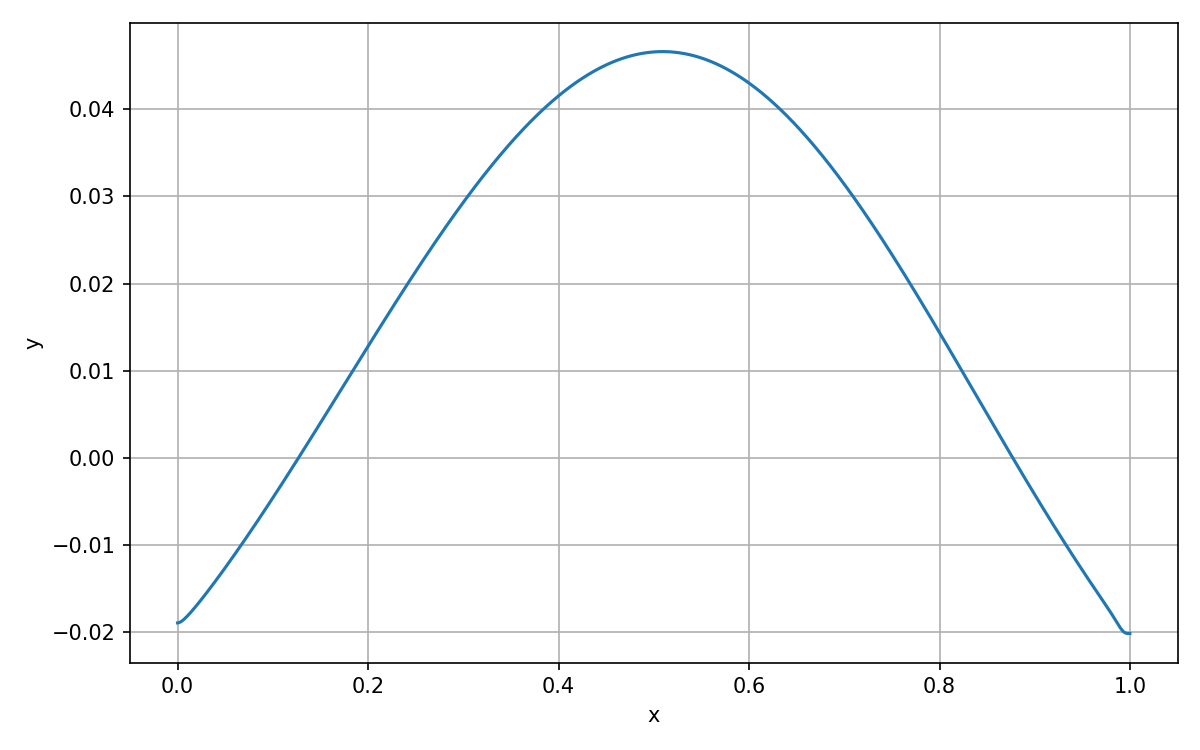

In [49]:
x = np.linspace(0, (N - 1) * h, N)

plt.figure(figsize = [8, 5])
plt.plot(x, y, label = 'y(x)')
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout() 
plt.grid()
plt.show()